In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import math
from sklearn import preprocessing
# Adjusting the size of matplotlib
import matplotlib as mpl
import datetime

df_full = pd.read_csv("AAPL.csv")
df_full.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/6/2018,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
1,9/7/2018,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2,9/10/2018,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
3,9/11/2018,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
4,9/12/2018,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
5,9/13/2018,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
6,9/14/2018,225.750000,226.839996,222.520004,223.839996,220.419571,31999300
7,9/17/2018,222.149994,222.949997,217.270004,217.880005,214.550659,37195100
8,9/18/2018,217.789993,221.850006,217.119995,218.240005,214.905167,31571700
9,9/19/2018,218.500000,219.619995,215.300003,218.369995,215.033142,27123800


In [2]:
df = df_full.loc[:,['Close','Volume']]
df['HL_PCT'] = (df_full['High'] - df_full['Low']) / df_full['Close'] * 100.0
df['PCT_change'] = (df_full['Close'] - df_full['Open']) / df_full['Open'] * 100.0
df.head()

,Close,Volume,HL_PCT,PCT_change
0,223.100006,34290000,2.711790,-1.383543
1,221.300003,37619800,2.105733,-0.247917
2,218.330002,39516500,2.464162,-1.185786
3,223.850006,35749000,3.457675,2.678781
4,221.070007,49278700,2.334104,-1.720457


In [3]:
df = df_full.loc[:,['Close','Volume','Low','High','Open']]
df.head()

,Close,Volume,Low,High,Open
0,223.100006,34290000,221.300003,227.350006,226.229996
1,221.300003,37619800,220.710007,225.369995,221.850006
2,218.330002,39516500,216.470001,221.850006,220.949997
3,223.850006,35749000,216.559998,224.300003,218.009995
4,221.070007,49278700,219.839996,225.000000,224.940002


In [4]:
# df.fillna(value=-99999, inplace=True)
# Print Data rows which are nan
df[df.isnull().any(axis=1)]

,Close,Volume,Low,High,Open


In [5]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
df['label'] = df[forecast_col].shift(-1)
df = df.drop(df[df.isnull().any(axis=1)].index)
X = np.array(df.drop(['label'], 1))
df.head()

,Close,Volume,Low,High,Open,label
0,223.100006,34290000,221.300003,227.350006,226.229996,221.300003
1,221.300003,37619800,220.710007,225.369995,221.850006,218.330002
2,218.330002,39516500,216.470001,221.850006,220.949997,223.850006
3,223.850006,35749000,216.559998,224.300003,218.009995,221.070007
4,221.070007,49278700,219.839996,225.000000,224.940002,226.410004


In [6]:
print(X)

[[2.23100006e+02 3.42900000e+07 2.21300003e+02 2.27350006e+02
  2.26229996e+02]
 [2.21300003e+02 3.76198000e+07 2.20710007e+02 2.25369995e+02
  2.21850006e+02]
 [2.18330002e+02 3.95165000e+07 2.16470001e+02 2.21850006e+02
  2.20949997e+02]
 ...
 [2.08740005e+02 2.11434000e+07 2.07199997e+02 2.10449997e+02
  2.10160004e+02]
 [2.05699997e+02 2.00230000e+07 2.04220001e+02 2.06979996e+02
  2.06429993e+02]
 [2.09190002e+02 1.91881000e+07 2.07320007e+02 2.09479996e+02
  2.08389999e+02]]


In [7]:
# We want to separate 10 percent of the data to forecast
forecast_out = int(math.ceil(0.3 * len(df)))

In [8]:
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
print(X)

[[ 1.46819738  0.11451718  1.48395658  1.55570418  1.61134704]
 [ 1.38270351  0.35427514  1.45584472  1.46267783  1.40406997]
 [ 1.24163881  0.49084458  1.2538188   1.29729909  1.36147826]
 ...
 [ 0.78614736 -0.83208681  0.81212577  0.76169538  0.85085652]
 [ 0.64175757 -0.91275977  0.67013624  0.59866521  0.67433882]
 [ 0.80752065 -0.97287567  0.81784395  0.71612207  0.76709344]]


In [9]:
# Split the data into trainings data and test data
X_test = X[-forecast_out:]
X_train = X[:-forecast_out]

In [10]:
# Separate label and identify it as y
y = np.array(df['label'])
y_train = y[:-forecast_out]
y_test = y[-forecast_out:]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [12]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [13]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [14]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [15]:
clfridge = Ridge(alpha=.5)
clfridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
clfridge = Ridge(alpha=.5)
clfridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
clflasso = Lasso(alpha=0.1)
clflasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [19]:
df[-forecast_out:]

,Close,Volume,Low,High,Open,label
175,183.089996,38612300,180.279999,184.350006,183.520004,186.600006
176,186.600006,28364800,184.699997,188.000000,185.220001,182.779999
177,182.779999,29748600,182.550003,185.710007,184.660004,179.660004
178,179.660004,36529700,177.809998,180.539993,179.800003,178.970001
179,178.970001,23714700,178.619995,182.139999,180.199997,178.229996
180,178.229996,27948200,177.910004,180.589996,178.919998,177.380005
181,177.380005,28481200,176.000000,179.350006,176.419998,178.300003
182,178.300003,21218400,176.669998,179.229996,177.949997,175.070007
183,175.070007,27043600,174.990005,177.990005,176.229996,173.300003
184,173.300003,40396100,170.270004,177.919998,175.600006,179.639999


In [20]:

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceridge = clfridge.score(X_test,y_test)
confidencelasso = clflasso.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The Ridge regression confidence is ', confidenceridge)
print('The Lasso confidence is ', confidencelasso)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.8869104432519574
The quadratic regression 2 confidence is  0.8904133662173961
The quadratic regression 3 confidence is  0.8787973012294132
The Ridge regression confidence is  0.8876544897040608
The Lasso confidence is  0.8865219661386587
The knn regression confidence is  0.821982827998009


In [21]:
# select the classifier to predict
forecast_set = clfpoly3.predict(X_test)

df['Forecast'] = np.nan
index = len(df)- forecast_out
for i in forecast_set:
    df['Forecast'].at[index] = i
    index += 1

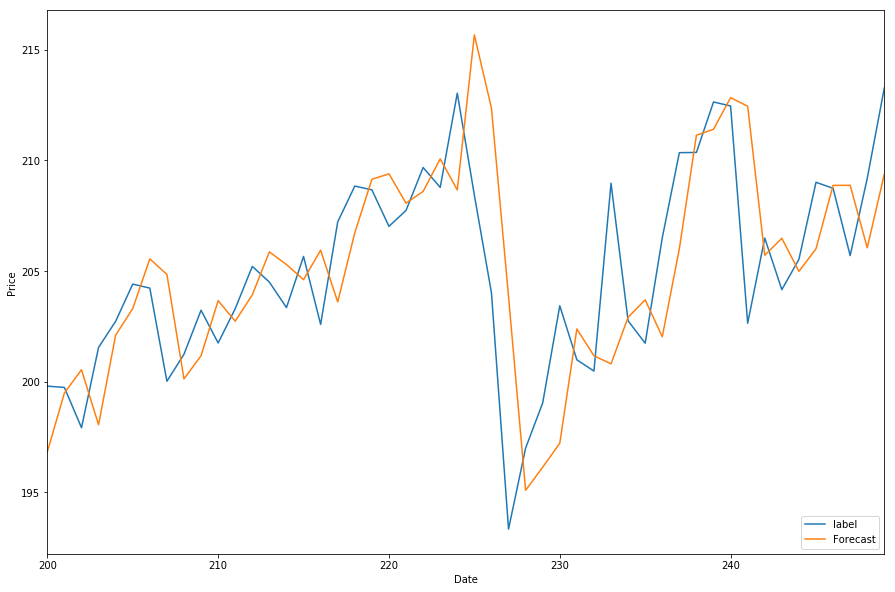

In [24]:
df['label'].tail(50).plot(figsize = (15,10))
df['Forecast'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()